In [23]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
data=pd.read_csv("./Data/train.csv")
data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
data=data.drop("qid",axis=1)

In [5]:
x=data["question_text"]
y=data["target"]

In [14]:
def lemmatize(df):
    res=[]
    count=df.shape[0]
    
    for row in df:
        doc=nlp(row)
        row=" ".join([w.lemma_ for w in nlp(row)])
        res.append(row)
        count=count-1
        
        if(count%5000==0):
            print("Remaining no. of rows= ",count)
            
    res=pd.Series(res)
    return res

In [7]:
example = pd.DataFrame({"col1":["this is spacy lemmatization testing.",
                                "some programming books are better than others",
                                "sounds like a quote from the Smiths"]})
example

,col1
0,this is spacy lemmatization testing.
1,some programming books are better than others
2,sounds like a quote from the Smiths


In [8]:
a=lemmatize(example.col1)
a

remaining =  0


0       this be spacy lemmatization testing .
1    some programming book be well than other
2           sound like a quote from the smith
dtype: object

In [15]:
lemmatized_x=lemmatize(x)

Remaining no. of rows=  1305000
Remaining no. of rows=  1300000
Remaining no. of rows=  1295000
Remaining no. of rows=  1290000
Remaining no. of rows=  1285000
Remaining no. of rows=  1280000
Remaining no. of rows=  1275000
Remaining no. of rows=  1270000
Remaining no. of rows=  1265000
Remaining no. of rows=  1260000
Remaining no. of rows=  1255000
Remaining no. of rows=  1250000
Remaining no. of rows=  1245000
Remaining no. of rows=  1240000
Remaining no. of rows=  1235000
Remaining no. of rows=  1230000
Remaining no. of rows=  1225000
Remaining no. of rows=  1220000
Remaining no. of rows=  1215000
Remaining no. of rows=  1210000
Remaining no. of rows=  1205000
Remaining no. of rows=  1200000
Remaining no. of rows=  1195000
Remaining no. of rows=  1190000
Remaining no. of rows=  1185000
Remaining no. of rows=  1180000
Remaining no. of rows=  1175000
Remaining no. of rows=  1170000
Remaining no. of rows=  1165000
Remaining no. of rows=  1160000
Remaining no. of rows=  1155000
Remainin

In [16]:
lemmatized_x.to_csv("lemma_fulldataset.csv",index=False)

# #Data cleaning (removing ?.!@#%_+}{ etc..)

In [17]:
import re

def clean_text(series):
    res=[]
    for row in series:
        text = re.sub(r'[^(a-zA-Z)\s]','', row)
        res.append(text)
    res=pd.Series(res)
    return res

In [19]:
lemmatized_x

0          how do Quebec nationalist see their province a...
1          do you have an adopted dog , how would you enc...
2          why do velocity affect time ? do velocity affe...
3          how do Otto von Guericke use the Magdeburg hem...
4          can I convert montra helicon d to a mountain b...
                                 ...                        
1306117    what other technical skill do you need as a co...
1306118    do MS in ECE have good job prospect in USA or ...
1306119                           be foam insulation toxic ?
1306120    how can one start a research project base on b...
1306121    who win in a battle between a Wolverine and a ...
Length: 1306122, dtype: object

In [20]:
cleaned_x=clean_text(lemmatized_x)

In [32]:
sinc=y.value_counts()[0]
insin=y.value_counts()[1]

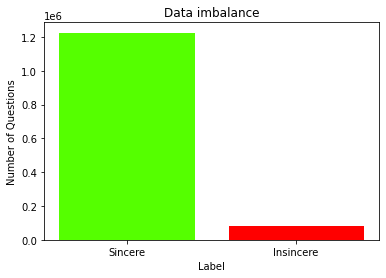

In [39]:
x=np.array(["Sincere","Insincere"])
y=np.array([sinc,insin])

plt.bar(x,y,color=["#55ff00","#ff0000"])
plt.ylabel("Number of Questions")
plt.xlabel("Label")
plt.title("Data imbalance")
plt.show()

***Its now clear that we have Imbalance in our data. From this I have came to a conclusion that i can't relay on accuracy itself for model validation. so i have to consider other validation metrics such as PRECISION, RECALL and F1 SCORE.*** 

In [22]:
df=pd.concat([cleaned_x,y],axis=1)
df

,0,target
0,how do Quebec nationalist see their province a...,0
1,do you have an adopted dog how would you enco...,0
2,why do velocity affect time do velocity affec...,0
3,how do Otto von Guericke use the Magdeburg hem...,0
4,can I convert montra helicon d to a mountain b...,0
...,...,...
1306117,what other technical skill do you need as a co...,0
1306118,do MS in ECE have good job prospect in USA or ...,0
1306119,be foam insulation toxic,0
1306120,how can one start a research project base on b...,0


***Saving our cleaned dataset for future experiments***

In [ ]:
df.to_csv("final-cleaned-dataset.csv",index=Fals)